<a href="https://colab.research.google.com/github/vineetbiyani09/ML/blob/master/EXP_3/J010_Exp_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1: Exploring Canadian immigration data from 1980 to 2013

Dataset:
https://colab.research.google.com/drive/1fT-yU_ygIPWwZeI_WEmCXpvZJV5ZE3n8
https://colab.research.google.com/drive/1AFTJ7hs3bTqFPVcFxlxfWeERkvNzSoq6

Topics:

Filtering

Basic statistics

Line plots

Area plots

Bar plots

Histograms

Assignment Questions:
Which two countries have the same immigration trends?




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [5]:
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')

In [6]:
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region'}, inplace=True)

In [7]:
canada['TotalImmigration'] = canada.sum(axis='columns')

In [8]:
canada.isnull().sum()

Country             0
Continent           0
Continent-Region    0
DevName             0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010                0
2011                0
2012                0
2013                0
TotalImmigration    0
dtype: int64

In [9]:
canada.set_index('Country', inplace = True)
canada.head()

,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [10]:
canada.columns = list(map(str,canada.columns))
canada.columns

Index(['Continent', 'Continent-Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'TotalImmigration'],
      dtype='object')

In [11]:
#Filtering the data countries with immigration > 10000 and continent Asia
canada[(canada['Continent']=='Asia')&(canada['2013']>10000)]

,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391


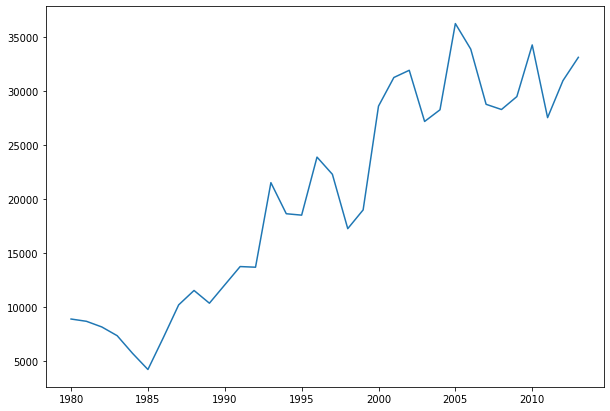

In [12]:
#xlabel
years = list(map(str, range(1980,2014)))
#immigration data of India over the years
india = canada.loc['India', years]
india.plot(figsize = (10,7))

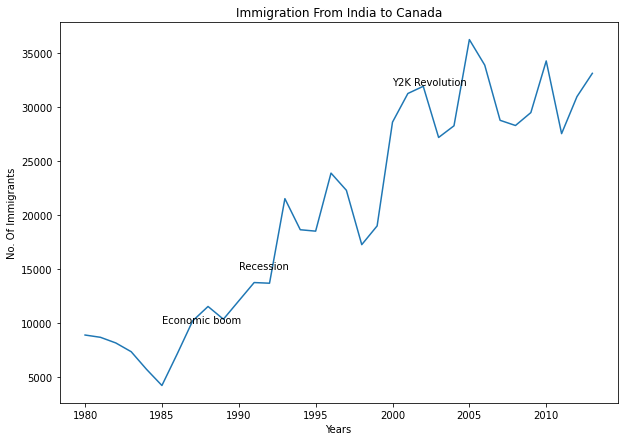

In [13]:
#adding labels for clarity
india.index = india.index.map(int)
india.plot(kind = 'line', figsize = (10,7))
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.title('Immigration From India to Canada')

plt.text(2000, 32000, 'Y2K Revolution')
plt.text(1990,15000,'Recession')
plt.text(1985,10000,'Economic boom')
plt.show()

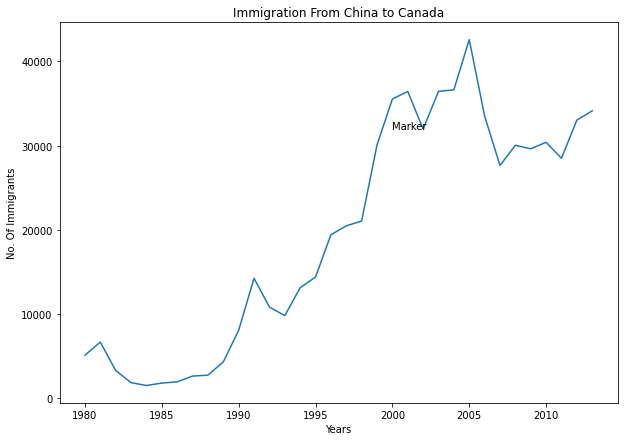

In [14]:
#immigration China 
china = canada.loc['China', years]
china.index = china.index.map(int)
china.plot(kind = 'line', figsize = (10,7))
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.title('Immigration From China to Canada')

plt.text(2000, 32000, 'Marker')
plt.show()

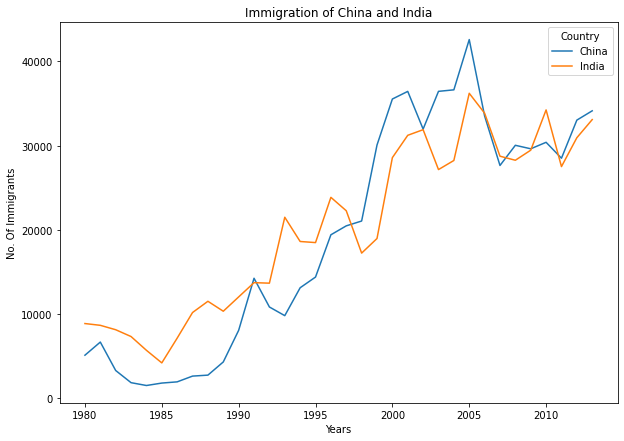

In [15]:
#Comparing the immigration trends of India and China
chinaindia = canada.loc[['China','India'], years]
new_chinaindia = chinaindia.transpose()
new_chinaindia.index = new_chinaindia.index.map(int)

new_chinaindia.plot(kind='line', figsize = (10,7))
plt.title('Immigration of China and India')
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.show()

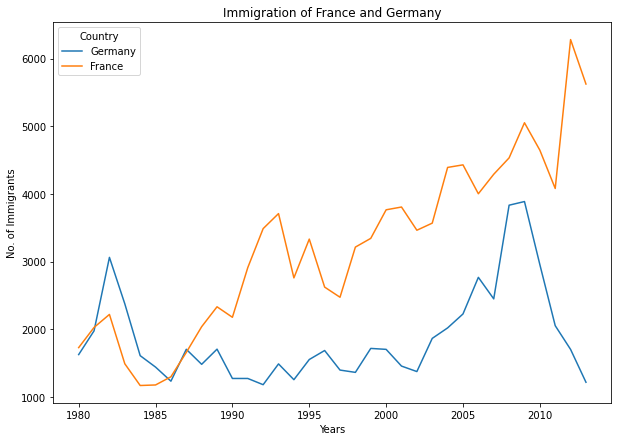

In [16]:
#Compare the immigration trends of France and Germany
frager = canada.loc[['Germany','France'], years]
frager = frager.transpose()
frager.index = frager.index.map(int)

frager.plot(kind='line', figsize = (10,7))
plt.title('Immigration of France and Germany')
plt.xlabel('Years')
plt.ylabel('No. of Immigrants')
plt.show()

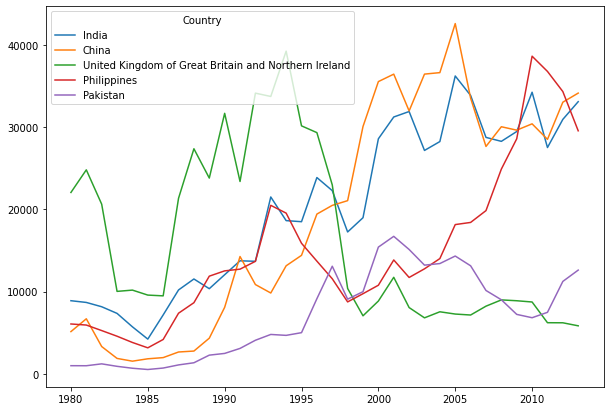

In [17]:
#Top 5 countries to send immigrants to Canada
temp = canada.sort_values(by='TotalImmigration', ascending=False, axis='index')
temp = temp.head(5)
new_temp = temp[years].transpose()
new_temp.plot(figsize = (10,7))

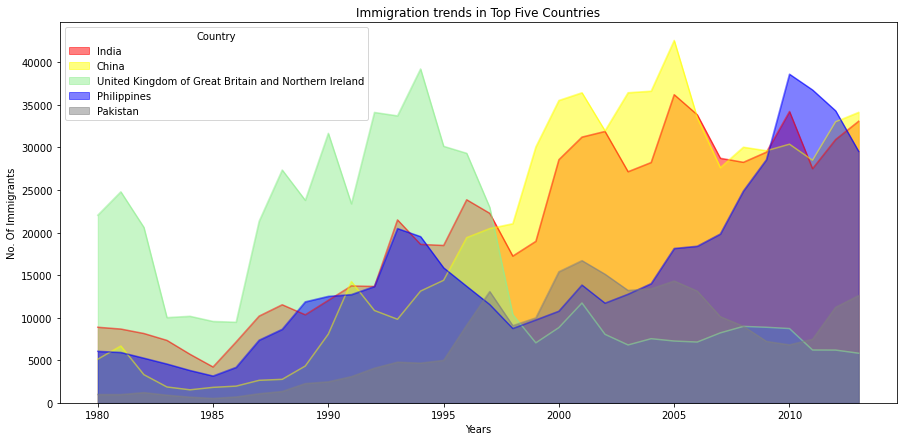

In [18]:
#Plotting Unstacked and Stacked Area Charts
new_temp.index = new_temp.index.map(int)
new_temp.plot(kind="area", stacked=False, figsize=(15,7),color = ['red','yellow','lightgreen','blue','grey'])

plt.title('Immigration trends in Top Five Countries')
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.show()

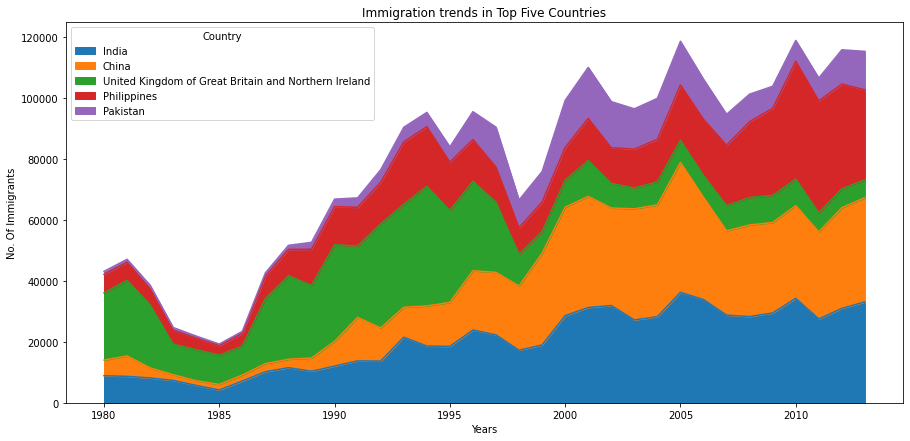

In [19]:
new_temp.plot(kind="area", stacked=True, figsize=(15,7))
plt.title('Immigration trends in Top Five Countries')
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.show()

Text(0, 0.5, 'No. Of Countries')

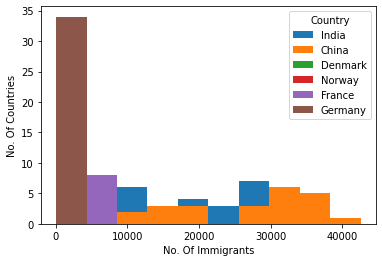

In [20]:
canada.loc[['India','China','Denmark','Norway','France','Germany'], years].transpose().plot.hist()
plt.xlabel('No. Of Immigrants')
plt.ylabel('No. Of Countries')

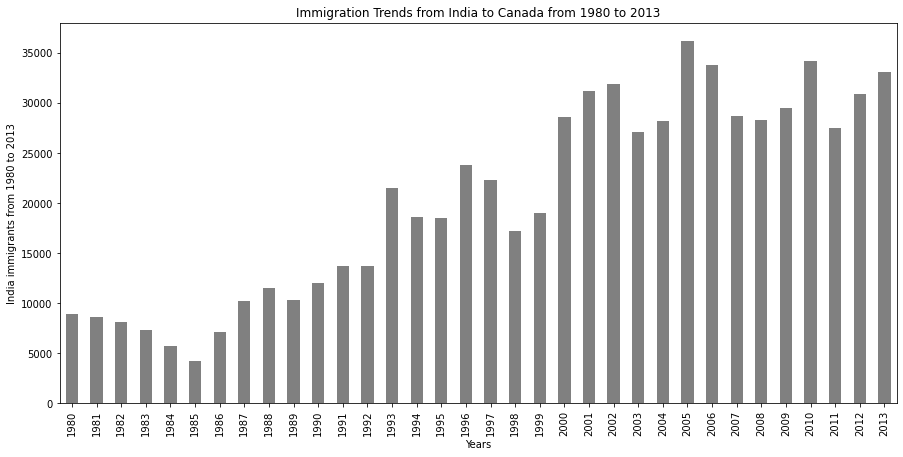

In [21]:
# Immigration from India to Canada
india.plot(kind='bar', figsize=(15,7),color = 'grey')

plt.title('Immigration Trends from India to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('India immigrants from 1980 to 2013')
plt.show()

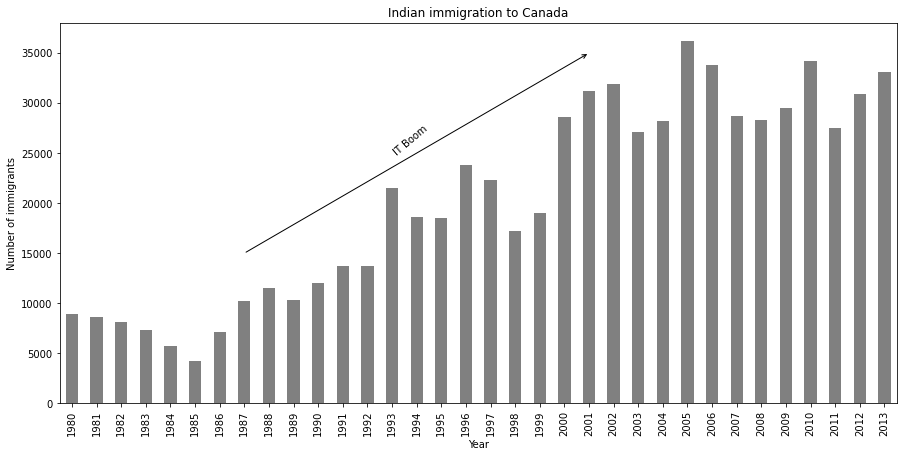

In [22]:
india.plot(kind='bar', figsize=(15,7),color ='grey')
plt.title("Indian immigration to Canada")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

plt.annotate('',  
             xy=(21,35000), 
             xytext=(7,15000), 
             xycoords='data',  
             arrowprops=dict(arrowstyle='->',color='black') 
             )

plt.annotate('IT Boom', 
             xy=(13,28000),  
             rotation=40, 
             xycoords='data', 
             va='top',
             ha='left') 
plt.show()